In [1]:
pip install networkx

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 

MENAMIPLKAN DATAFRAME DARI HASIL CRAWLING PADA TWITTER DENGAN #VAKSINASI PADA LOKASI INDONESIA

In [3]:
pdEdgeList = pd.read_csv('HasilDataCrawling.csv')
pdEdgeList

,Unnamed: 0,ids,texts,user_ids,user_screen_name,in_reply_to_user_ids,in_reply_to_screen_names,user_mentionses,created_ats
0,0,1.377510e+18,RT @danskuuy: Kurang lebih sudah 250 ribu warg...,1.162116e+09,Angelina_Joelia,NaN,NaN,"[{'screen_name': 'danskuuy', 'name': 'ᴀɴᴀᴋ ꜱɪɴ...",4/1/2021 6:26
1,1,1.377510e+18,RT @danskuuy: Kurang lebih sudah 250 Ribu masy...,1.162116e+09,Angelina_Joelia,NaN,NaN,"[{'screen_name': 'danskuuy', 'name': 'ᴀɴᴀᴋ ꜱɪɴ...",4/1/2021 6:22
2,2,1.377500e+18,"RT @Satria180806: ""Vaksin Merah Putih ini adal...",3.841761e+08,Vendra_Deje,NaN,NaN,"[{'screen_name': 'Satria180806', 'name': 'Satr...",4/1/2021 6:12
3,3,1.377500e+18,"RT @lps_idic: Bila sudah vaksin Covid-19, apak...",1.073810e+18,LiiaMonday,NaN,NaN,"[{'screen_name': 'lps_idic', 'name': 'LPS RI /...",4/1/2021 5:54
4,4,1.377500e+18,"RT @lps_idic: Bila sudah vaksin Covid-19, apak...",2.322361e+09,yenarsyah,NaN,NaN,"[{'screen_name': 'lps_idic', 'name': 'LPS RI /...",4/1/2021 5:51
...,...,...,...,...,...,...,...,...,...
994,994,1.376150e+18,"Orang ini kerjanya Berburu terus, ga tau kalo ...",1.030220e+18,SiNiel1,NaN,NaN,[],3/28/2021 12:39
995,995,1.376150e+18,"RT @jokowi: Indonesia sudah mendatangkan 53,5 ...",1.350660e+18,SNataprajasule,NaN,NaN,"[{'screen_name': 'jokowi', 'name': 'Joko Widod...",3/28/2021 12:38
996,996,1.376150e+18,"RT @jokowi: Indonesia sudah mendatangkan 53,5 ...",4.907812e+09,AbgHery,NaN,NaN,"[{'screen_name': 'jokowi', 'name': 'Joko Widod...",3/28/2021 12:31
997,997,1.376150e+18,"RT @jokowi: Indonesia sudah mendatangkan 53,5 ...",9.703420e+17,IlmiawanLepas,NaN,NaN,"[{'screen_name': 'jokowi', 'name': 'Joko Widod...",3/28/2021 12:30


In [4]:
# pdEdgeList = pdEdgeList.dropna(axis='rows')
# pdEdgeList.head()

In [5]:
# pdEdgeList.to_csv('pdEdgeList.csv')

In [6]:
gpd = nx.Graph()
for i in range(0,len(pdEdgeList)):
  gpd.add_edge(pdEdgeList['user_screen_name'].loc[i],pdEdgeList['texts'].loc[i])

  

MENAMBAHKAN EDGE KE DALAM GRAPH NX BERDASARKAN USER NAME DAN ISI DARI TWEET

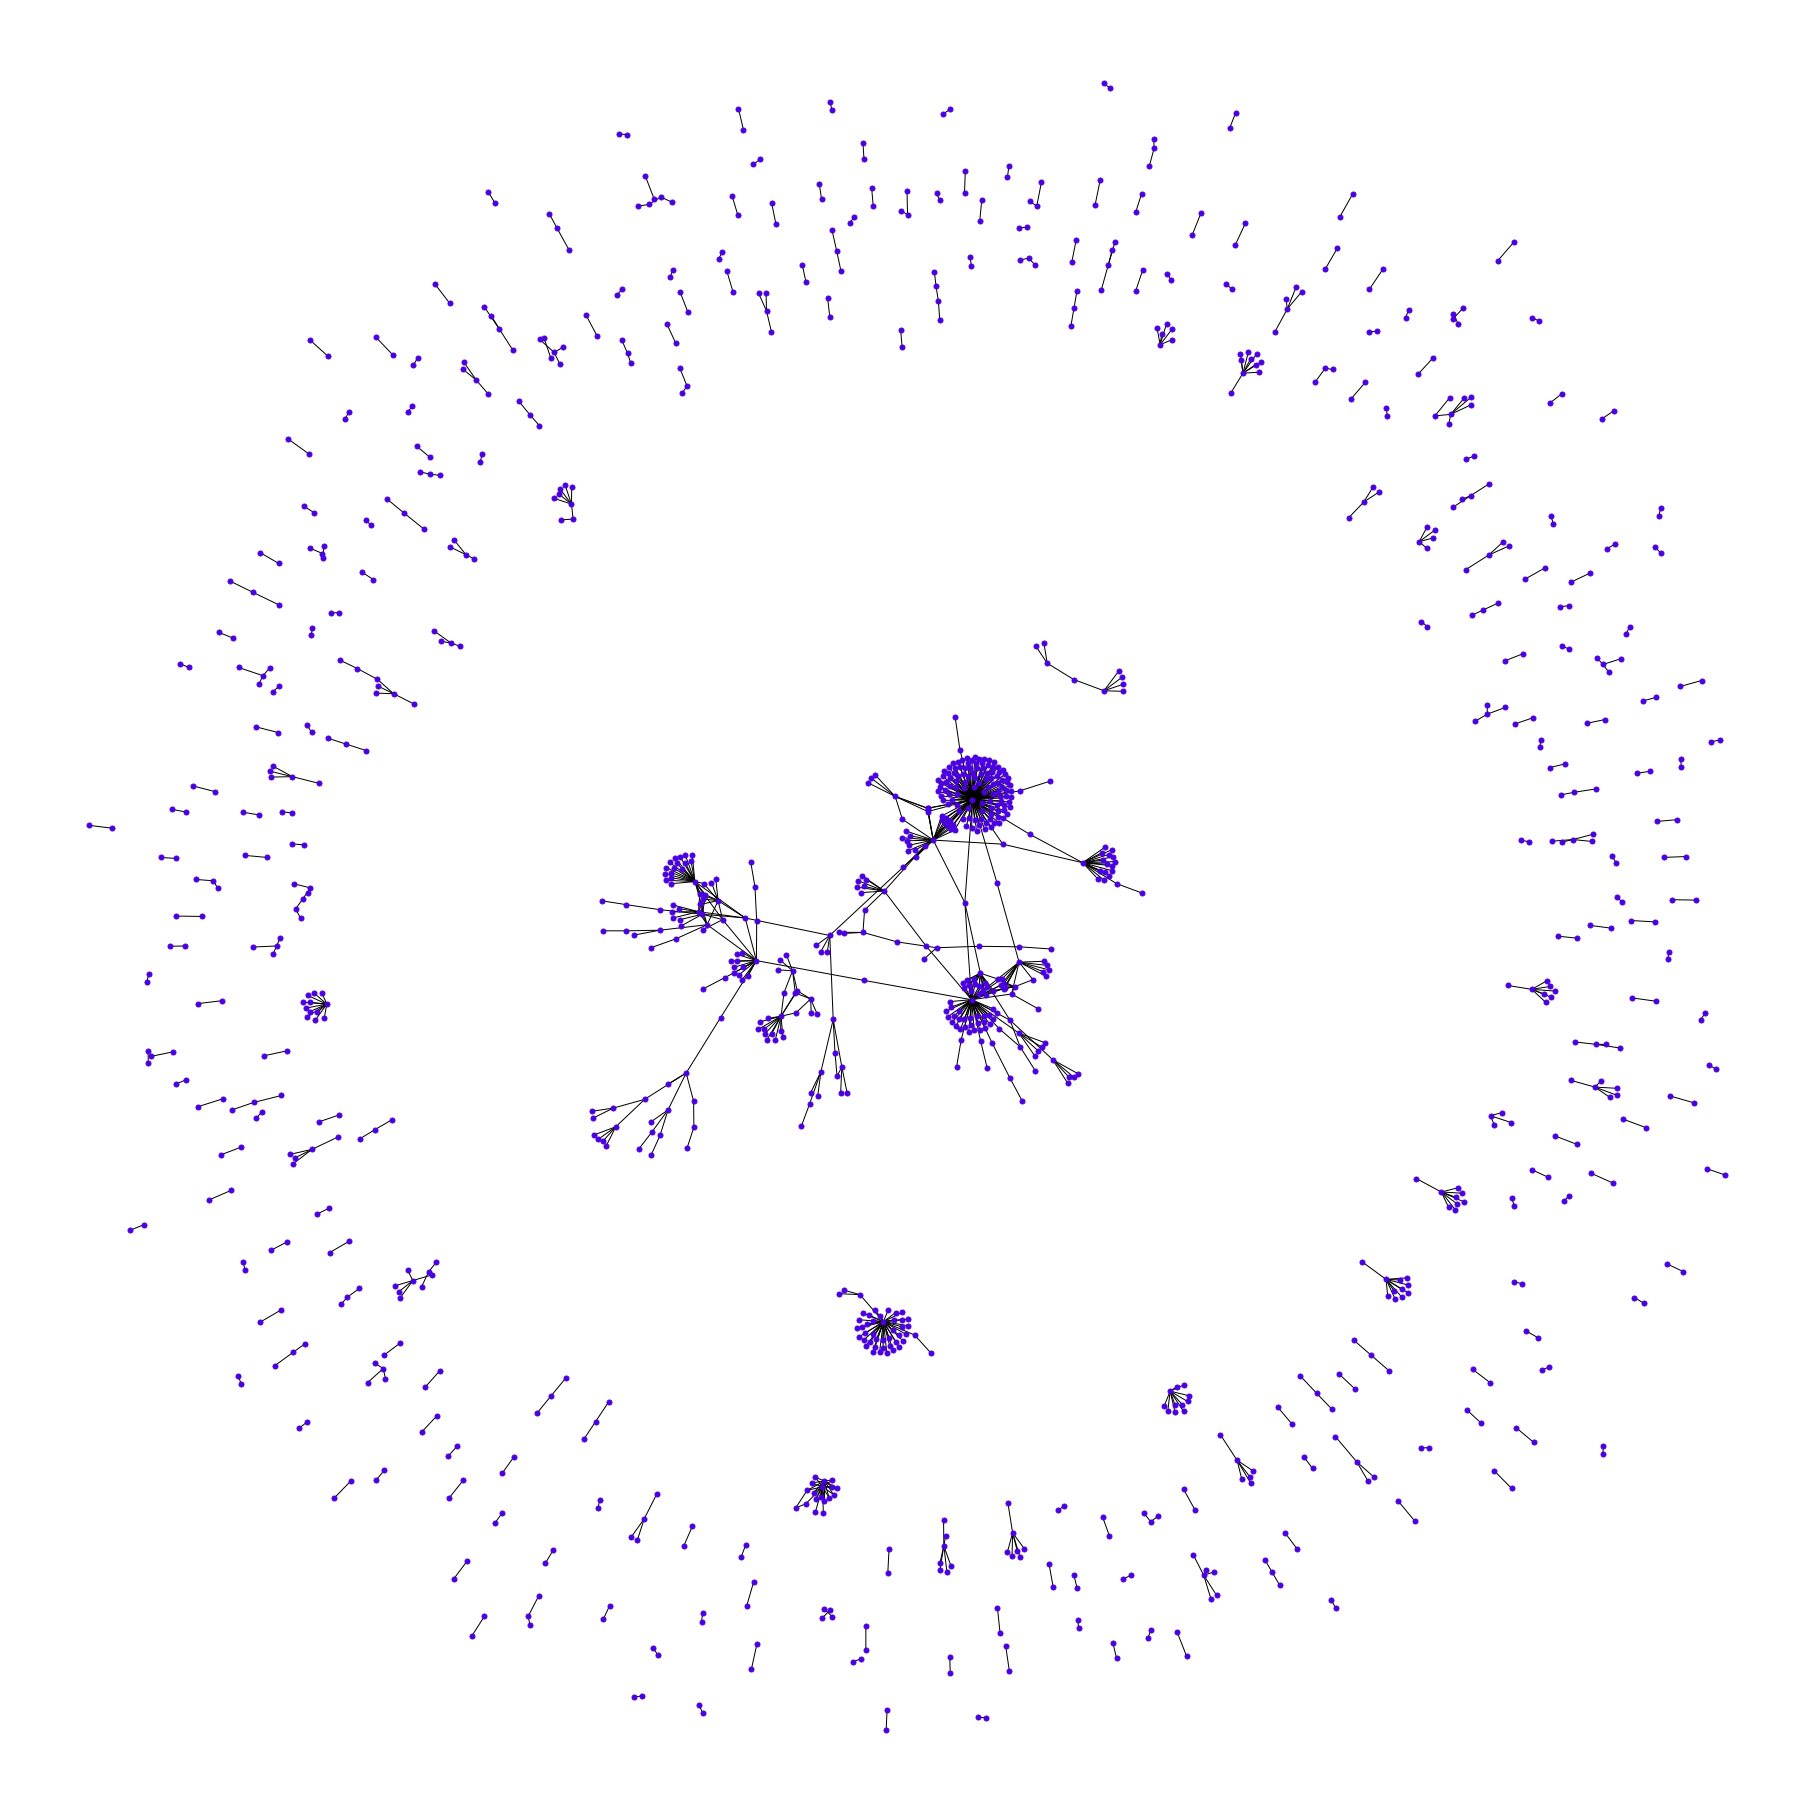

In [7]:
fig = plt.figure(figsize=(25, 25)) 
nx.draw(gpd, node_size=25,node_color='#4A00E0') 
plt.axis('equal') 
plt.show()

In [8]:
# #menambahkan edgelist ke dalam graph
# for i, elrow in pdEdgeList.iterrows():
#     gpd.add_edge(elrow[0], elrow[1])

FUNGSI UNTUK MENGHITUNG DEGREE DARI GRAPH

In [9]:
#function untuk menghitung degree dari graph
def calculate_degree(gpd,n = 0):
    fmdegree = []
    fmNode= []
    for node in gpd.nodes():
        tempD = gpd.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
    
    return fmdegree,fmNode

In [10]:
gpdDegree, gpdNode = calculate_degree(gpd,0)

MENCARI NILAI MAXIMUM DAN MINIMUM DEGREE DARI JARINGAN

In [11]:
#maximun & minumum degree dari node
print('Maximum Degree of the node in this network :', max(gpdDegree))
print('Manimum Degree of the node in this network :', min(gpdDegree))

Maximum Degree of the node in this network : 129
Manimum Degree of the node in this network : 1


MENGCONVERT NODE DAN DEGREE KE DALAM DATAFRAME

In [12]:
data = {'Node' : gpdNode,
        'Degree' : gpdDegree}
df_NodeDegree = pd.DataFrame(data)
df_NodeDegree.head(10)

,Node,Degree
0,Angelina_Joelia,2
1,RT @danskuuy: Kurang lebih sudah 250 ribu warg...,4
2,RT @danskuuy: Kurang lebih sudah 250 Ribu masy...,2
3,Vendra_Deje,1
4,"RT @Satria180806: ""Vaksin Merah Putih ini adal...",2
5,LiiaMonday,2
6,"RT @lps_idic: Bila sudah vaksin Covid-19, apak...",2
7,yenarsyah,1
8,lps_idic,1
9,"Bila sudah vaksin Covid-19, apakah kita jadi k...",1


TOP 5 PENGGUNA DENGAN DEGREE TERTINGGI

In [13]:
df_NodeDegree.sort_values(by=['Degree'], inplace=True, ascending=False)
df_NodeDegree.head(10)

,Node,Degree
64,"RT @jokowi: Indonesia sudah mendatangkan 53,5 ...",129
180,"RT @KemenkesRI: #Healthies, sudah lebih dari 2...",57
780,"RT @ontynad: Kabar baik untuk kita, 10 juta va...",41
65,RT @jokowi: Program vaksinasi massal Covid-19 ...,24
736,RT @ChusnulCh__: Indonesia saat ini posisi 4 b...,23
374,"RT @SiNiel1: Orang ini kerjanya Berburu terus,...",18
233,RT @narkosun: Jumlah penduduk yg sdh divaksin ...,17
464,RT @KemenkesRI: Pemerintah tentunya terus meng...,17
377,RT @Ngookk_: Menteri Kesehatan Budi Gunadi Sad...,15
146,RT @slankdotcom: Media Group X Slank mempersem...,14


VISUALISASI NETWORK

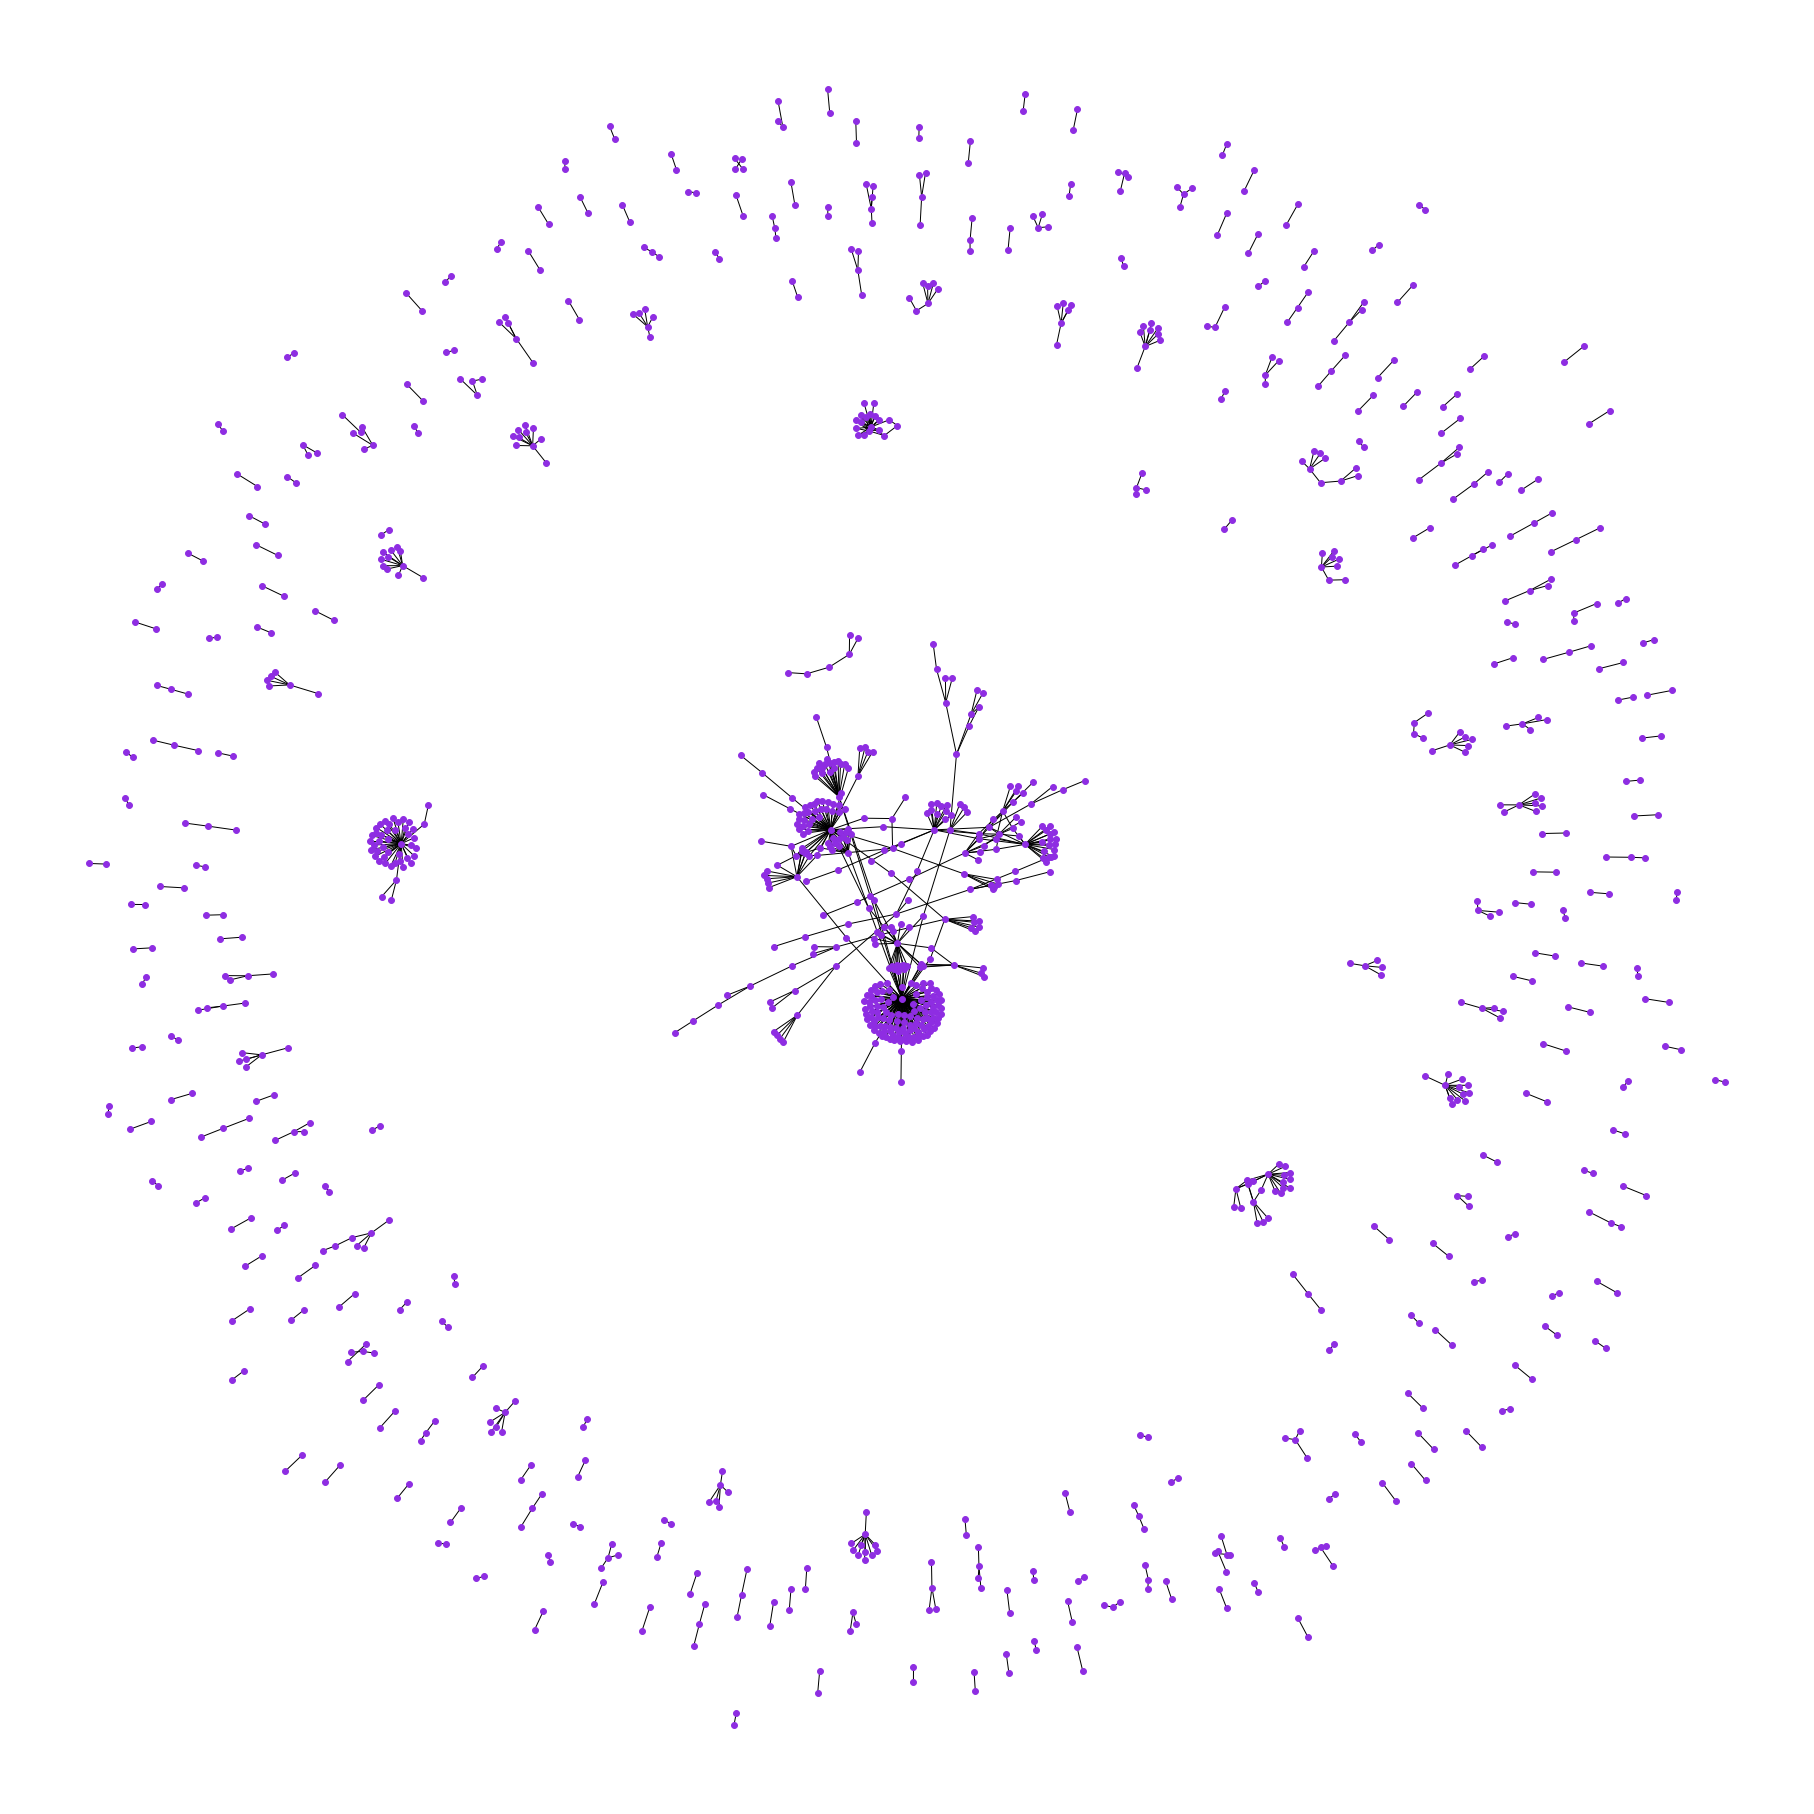

In [14]:
fig = plt.figure(figsize=(25, 25)) 
nx.draw(gpd, node_size=35,node_color='#8E2DE2')
plt.show()

MENCARI NILAI DEGREE BERDASARKAN TWEET PENGGUNA YANG PALING BERPENGARUH

In [15]:
dc = nx.degree_centrality(gpd)
ori = list(dc.values())

datas = {'Nodes' : gpd,
        'Nilai' : ori}
gpdframe = pd.DataFrame(datas)
gpdframe.head(10)


,Nodes,Nilai
0,Angelina_Joelia,0.001669
1,RT @danskuuy: Kurang lebih sudah 250 ribu warg...,0.003339
2,RT @danskuuy: Kurang lebih sudah 250 Ribu masy...,0.001669
3,Vendra_Deje,0.000835
4,"RT @Satria180806: ""Vaksin Merah Putih ini adal...",0.001669
5,LiiaMonday,0.001669
6,"RT @lps_idic: Bila sudah vaksin Covid-19, apak...",0.001669
7,yenarsyah,0.000835
8,lps_idic,0.000835
9,"Bila sudah vaksin Covid-19, apakah kita jadi k...",0.000835


Setelah diurutkan dengan nilai degree didapatkan 10 tweet teratas

In [16]:
gpdframe.sort_values(by=['Nilai'], inplace=True, ascending=False)
gpdframe.head(10)

,Nodes,Nilai
64,"RT @jokowi: Indonesia sudah mendatangkan 53,5 ...",0.107679
180,"RT @KemenkesRI: #Healthies, sudah lebih dari 2...",0.047579
780,"RT @ontynad: Kabar baik untuk kita, 10 juta va...",0.034224
65,RT @jokowi: Program vaksinasi massal Covid-19 ...,0.020033
736,RT @ChusnulCh__: Indonesia saat ini posisi 4 b...,0.019199
374,"RT @SiNiel1: Orang ini kerjanya Berburu terus,...",0.015025
233,RT @narkosun: Jumlah penduduk yg sdh divaksin ...,0.014190
464,RT @KemenkesRI: Pemerintah tentunya terus meng...,0.014190
377,RT @Ngookk_: Menteri Kesehatan Budi Gunadi Sad...,0.012521
146,RT @slankdotcom: Media Group X Slank mempersem...,0.011686


In [17]:
gpdframe.to_csv('influencer.csv')

In [18]:
max_dc = list(dc.values())
max_dc.sort(reverse=True)
print(max_dc)


[0.10767946577629382, 0.04757929883138565, 0.034223706176961605, 0.02003338898163606, 0.019198664440734557, 0.015025041736227046, 0.014190317195325543, 0.014190317195325543, 0.012520868113522538, 0.011686143572621035, 0.011686143572621035, 0.01001669449081803, 0.009181969949916527, 0.008347245409015025, 0.008347245409015025, 0.008347245409015025, 0.007512520868113523, 0.007512520868113523, 0.007512520868113523, 0.00667779632721202, 0.00667779632721202, 0.00667779632721202, 0.005843071786310518, 0.005843071786310518, 0.005843071786310518, 0.005008347245409015, 0.005008347245409015, 0.005008347245409015, 0.005008347245409015, 0.005008347245409015, 0.005008347245409015, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.004173622704507512, 0.00333889816360601, 0.003338898163606

Referensi 

https://medium.com/future-vision/visualizing-twitter-interactions-with-networkx-a391da239af5


---


https://www.youtube.com/watch?v=NgkMVRGeS1c&t=967s&ab_channel=JCharisTech%26J-Secur1ty

